# Lab 1: Introduction to Python

## Loading data
### Boston data

In [1]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

#### data dimension

In [2]:
print(data.shape)

(506, 13)


#### subset of data

In [3]:
data[:,1]
data[1:3,0:2]

array([[0.02731, 0.     ],
       [0.02729, 0.     ]])

### Iris data

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.data.shape)
print(iris.target_names)

(150, 4)
['setosa' 'versicolor' 'virginica']


#### The first two features

In [5]:
X = iris.data[:, :2]
y = iris.target

#### Plot the first two features

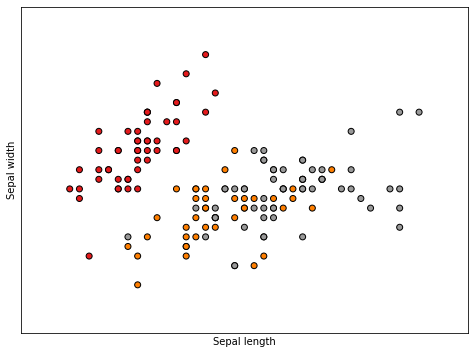

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

plt.figure(2, figsize=(8, 6))
plt.clf()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

plt.show()

#### Plot the first three PCA dimensions

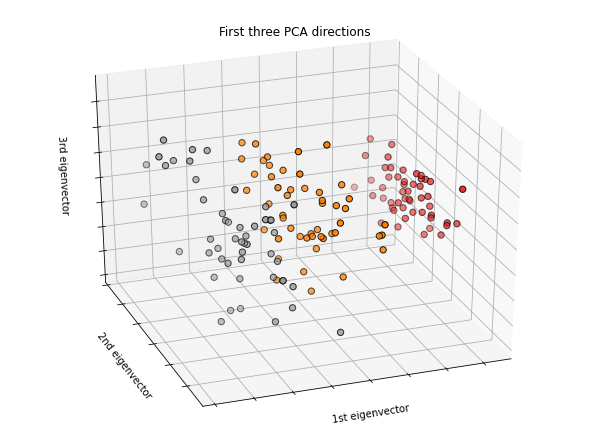

In [7]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

### Digit data

In [8]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
print(digits.target)

(1797, 64)
[0 1 2 ... 8 9 8]


#### Plot an image

<Figure size 432x288 with 0 Axes>

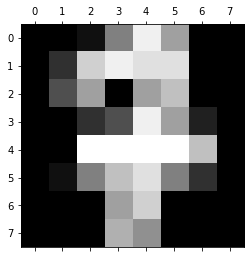

In [9]:
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[17]) 
plt.show()

## Simulating data


### Generate random numbers [0,1]

In [10]:
from random import seed
from random import random

seed(14)
for _ in range(10):
    value = random()
    print(value)

0.10682853770165568
0.7025855239868555
0.6520420203142754
0.9403523895661179
0.27111522656032316
0.25577551343303917
0.7340593641446967
0.6584500182400758
0.3029879738883551
0.6842331280769555


### Generate random integers

In [11]:
from random import seed
from random import randint
# seed random number generator
seed(1)
# generate some integers
for _ in range(10):
    value = randint(0, 10)
    print(value)

2
9
1
4
1
7
7
7
10
6


### Generating a random sample without replacement

In [12]:
# select a random sample without replacement
from random import seed
from random import sample
# seed random number generator
seed(1)
# prepare a sequence
sequence = [i for i in range(20)]
print(sequence)
# select a subset without replacement
subset = sample(sequence, 5)
print(subset)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[4, 18, 2, 8, 3]


### Generating random numbers from distributions

Normal distribution
1.2881847531554629
1.449445608699771
0.06633580893826191
-0.7645436509716318
-1.0921732151041414
0.03133451683171687
-1.022103170010873
-1.4368294451025299
0.19931197648375384
0.13337460465860485

Uniform
0.8357651039198697
0.43276706790505337
0.762280082457942
0.0021060533511106927
0.4453871940548014
0.7215400323407826
0.22876222127045265
0.9452706955539223
0.9014274576114836
0.030589983033553536

Exponential
0.0025775205901396527
0.07796041064717965
0.27993297008677476
0.04799800085423127
0.02441110881957027
0.054838311851086355
0.0029470817314445606
0.025063251747169862
0.05760534377901244
0.06848065433446529

Gamma
[14.56354443627256, 14.659154776645254, 15.196838788368431, 7.773911922663126, 12.386276928248169, 38.401812833631894, 1.7724091434819835, 5.861701913254062, 4.427085711348484, 16.82512679095396]

Multivariate normal
[[ 0.40988466  0.8112382 ]
 [ 0.81943499 -0.36942933]
 [-1.56901263 -0.86276365]
 [-1.06144266  0.27401755]
 [ 0.47395187  0.22263285]
 

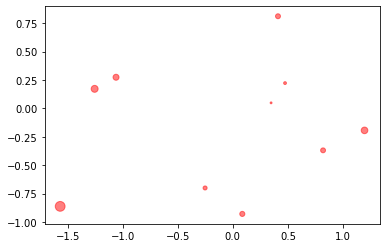

In [13]:
import random

# seed random number generator
random.seed(1)

# generate some Gaussian values
print("Normal distribution")
for _ in range(10):
    value = random.gauss(0, 1)
    print(value)

# generate uniform    
print("\nUniform")
for _ in range(10):
    value = random.uniform(0, 1)
    print(value)

# generate exponential    
print("\nExponential")
for _ in range(10):
    value = random.expovariate(10)
    print(value)   
    
# generate Gamma  
print("\nGamma")
value = list(range(10))
for i in range(10):
    value[i] = random.gammavariate(1,10)
print(value) 

# generate multivariate normal
print("\nMultivariate normal")
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import multivariate_normal

rmvn = np.array([x[:] for x in [[0.1]*2]*10])
for i in range(10):
    rmvn[i,] = multivariate_normal.rvs(mean = [0.5, -0.2], cov=[[2.0, 0.3], [0.3, 0.5]])
print(rmvn)

plt.scatter(rmvn[:,0], rmvn[:,1], s= 30*(rmvn[:,0]**2+rmvn[:,1]**2), c="red", alpha=0.5)

### Generate 2D classification points

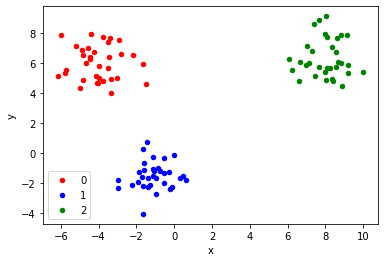

In [14]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=3, n_features=2)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

### Generating circle data for classification

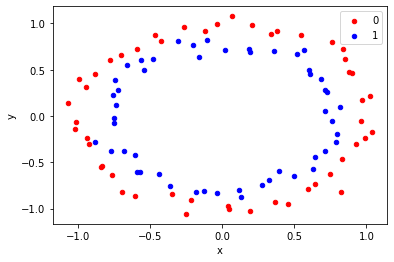

In [15]:
from sklearn.datasets import make_circles
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.05)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()